<a href="https://colab.research.google.com/github/oumaigithubb/cat-dog-classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **we will train a model to classify images of cats and dogs using fastai by employing fewer than 20 lines of code**

## the first line of code imports all the necessary functions, modules, and libraries from the fastai.vision.all package. The asterisk * symbol means that all the functions and objects from the package will be imported and available for use in the code.

In [1]:
#importing necesary dependencies
from fastai.vision.all import *

## The second line of code sets the path variable to the path of the 'images' folder within the 'PETS' dataset. The untar_data function is used to download and extract the dataset from the specified URL (URLs.PETS).

In [2]:
#seting the path variable to the path of the 'images' folder within the 'PETS' dataset
path = untar_data(URLs.PETS)/'images'

# The 3rd line of code defines a function named 'is_cat'. This function takes a parameter x and returns True if the first character of x is uppercase, indicating that it is a cat image. This function will be used later in the code for labeling the images.


In [3]:
def is_cat(x): return x[0].isupper()

## The 4-6th line of code creates an ImageDataLoaders object named dls using the from_name_func method. This method takes several parameters:

path: The path to the dataset.

*   get_image_files(path): A function that returns a list of image file paths in the specified path.
*   valid_pct=0.2: The percentage of images to be used for validation (20% in this case).


*   seed=42: The seed value for randomization.
*   label_func=is_cat: The function to use for labeling the images.


*   
item_tfms=Resize(224): The transformation to apply to each image (resizing to a size of 224x224 in this case).











In [4]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# The 7-8th lines of code creates a vision_learner object named learn using the vision_learner function. This function takes the following parameters:

dls: The ImageDataLoaders object created in the previous line.

*   resnet34: The model architecture to use (in this case, ResNet34).
*   metrics=error_rate: The metric to use for evaluation (error rate in this case).




In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.172212,0.019227,0.004736,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.061996,0.011004,0.004736,00:51


The code from line 9 to 14 is responsible for uploading an image, creating a PILImage object, displaying the image, and making a prediction using the trained model.

In [6]:
from google.colab import files
uploader = files.upload()

Saving download.jpeg to download (1).jpeg


<Axes: >

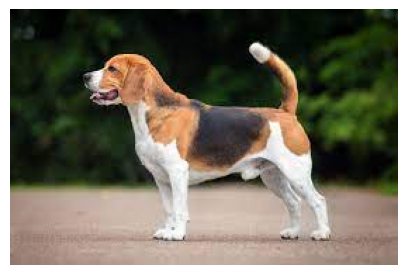

In [13]:
for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()





## The 15th line of code prints the predicted label of the uploaded image using the label variable, which was obtained from the learn.predict method. The label represents whether the image is classified as a cat or not.

In [15]:
label,_,probs = learn.predict(img)

## The 16-17th lines of code prints the probability of the image being a cat. It uses string formatting to display the probability value with 6 decimal places, obtained from the probs variable, which was also obtained from the learn.predict method.

In [16]:
print(f"is this a cat?: {label}.")
print(f"probability is cat:  {probs[1].item():.6f}")

is this a cat?: False.
probability is cat:  0.000184
